## **Домашнее задание Pandas (2)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

babies = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/babies%20names/babies_all.txt', index_col=0)
pima = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')

c:\python38\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
babies

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


In [3]:
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


## Задание 1.
Исследуйте набор данных babies. Ответьте на вопросы.

1) Какие годы включает датасет


In [4]:
babies.year.unique()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
      dtype=int64)

2) Какое имя в датасете находится по индексом 121?

In [5]:
babies.name.iloc[121]

'Ann'

3) Cколько всего родилось детей по имени 'Aaron' за все время?



In [6]:
babies.number[babies.name == "Aaron"].sum()

527668

4) Насколько больше за все время родилось мальчиков чем девочек?

In [7]:
babies.number[babies.sex == "M"].sum() - babies.number[babies.sex == "F"].sum()

2422447

5) Cколько мальчиков родилось в 2010?

In [8]:
babies.number[(babies.sex == 'M') & (babies.year == 2010)].sum()

1898382

6) Сколько в датасете девочек по имени John?

In [9]:
babies.number[(babies.sex == 'F') & (babies.name == 'John')].sum()

21578

## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: babies_girls и babies_boys.
2. Создайте фигуру matplotlib с 3 графиками один под другим.
3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y. 
4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.
5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут .index


In [10]:
babies_girls = babies[babies.sex == 'F'].groupby(['year'])['number'].sum().to_frame()
babies_girls

,number
year,
1880,90993
1881,91955
1882,107851
1883,112322
1884,129021
...,...
2006,1896468
2007,1916888
2008,1883645


In [11]:
babies_boys = babies[babies.sex == 'M'].groupby(['year'])['number'].sum().to_frame()
babies_boys

,number
year,
1880,110493
1881,100748
1882,113687
1883,104632
1884,114445
...,...
2006,2050234
2007,2069242
2008,2032310


In [12]:
import numpy as np

In [13]:
plt_ymax = max(max(babies_girls.number), max(babies_boys.number))

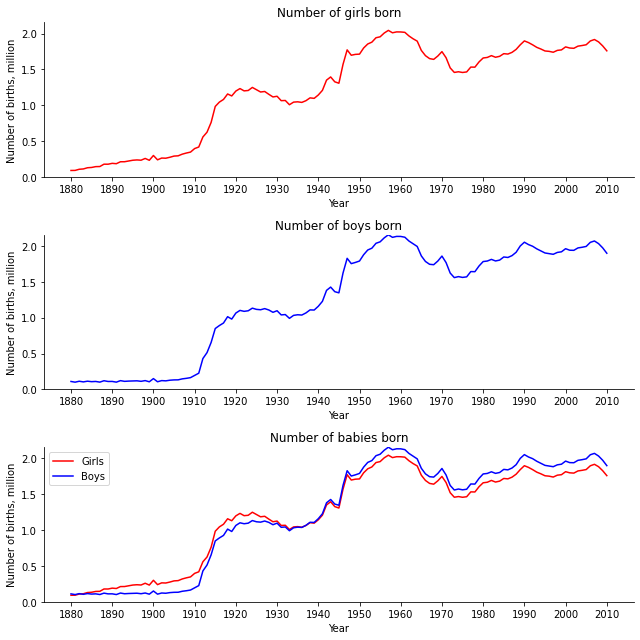

In [14]:
plt.figure(figsize=(9,9))

plt.subplot(3, 1, 1)
plt.plot(babies_girls, 
         color='red')
plt.title('Number of girls born')
plt.xlabel('Year')
plt.ylabel('Number of births, million')
plt.xticks(np.arange(min(babies.year), max(babies.year)+1, 10))
plt.ylim((0, plt_ymax+1))
plt.yticks(np.arange(0, plt_ymax, 500000),
           np.arange(0, plt_ymax/1000000, 0.5))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 1, 2)
plt.plot(babies_boys, 
         color='blue')
plt.title('Number of boys born')
plt.xlabel('Year')
plt.ylabel('Number of births, million')
plt.xticks(np.arange(min(babies.year), max(babies.year)+1, 10))
plt.ylim((0, plt_ymax+1))
plt.yticks(np.arange(0, plt_ymax, 500000),
           np.arange(0, plt_ymax/1000000, 0.5))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 1, 3)
plt.plot(babies_girls, 
         color='red',
         label='Girls')
plt.plot(babies_boys, 
         color='blue',
         label='Boys')
plt.title('Number of babies born')
plt.xlabel('Year')
plt.ylabel('Number of births, million')
plt.xticks(np.arange(min(babies.year), max(babies.year)+1, 10))
plt.ylim((0, plt_ymax+1))
plt.yticks(np.arange(0, plt_ymax, 500000),
           np.arange(0, plt_ymax/1000000, 0.5))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()

plt.tight_layout()

plt.show()

Тренды рождаемости для мальчиков и девочек совпадают. Примерно до середины 1930-х гг. девочки преобладали среди новорождённых. С 1950-х гг. перевес мальчиков стал более заметным.

Что касается изменений рождаемости в целом, то можно выделить периоды:
* сильного роста рождаемости (примерно с 1910 по 1920 гг. и с начала 1940-х до начала 1960-х гг.), 
* сильного снижения рождаемости (с начала 1960-х до середины 1970-х гг.), 
* умеренного роста рождаемости (конец XIX - начало XX вв. и период с середины 1970-х по конец 1980-х гг.) и 
* относительной стабилизации или небольших колебаний рождаемости (с 1920-1930-е гг. и 1990-2000-е гг.).

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).
2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.
3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.
4. Постройте 4 линейных графика - тренд для каждого имени за все время.
5. Верхняя и правая границы графиков должны быть невидимы, каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.
6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
7. Опишите тренды в ячейке markdown под графиками.



In [15]:
babies_names = babies.groupby(['sex', 'name'])['number'].sum().to_frame()
babies_names.groupby('sex')['number'].nlargest(2)

sex  sex  name    
F    F    Mary        4103935
          Patricia    1568742
M    M    James       5049727
          John        5040319
Name: number, dtype: int64

В п.2 сказано найти, сколько _детей_ рождалось с таким именем. Я буду искать только, сколько _детей соответствующего пола_ рождалось с таким именем, т.к. из заданий выше было ясно, что и девочек могли называть John'ами.

In [16]:
babies_mary = babies.loc[(babies.sex == 'F') & (babies.name == 'Mary'), ['year', 'number']]
babies_patr = babies.loc[(babies.sex == 'F') & (babies.name == 'Patricia'), ['year', 'number']]
babies_james = babies.loc[(babies.sex == 'M') & (babies.name == 'James'), ['year', 'number']]
babies_john = babies.loc[(babies.sex == 'M') & (babies.name == 'John'), ['year', 'number']]

babies_mary.set_index(['year'], inplace=True)
babies_patr.set_index(['year'], inplace=True)
babies_james.set_index(['year'], inplace=True)
babies_john.set_index(['year'], inplace=True)

In [17]:
plt_max = max(babies_mary['number'].max(), babies_patr['number'].max(), babies_james['number'].max(), babies_john['number'].max())
plt_max

94601

In [18]:
plt_max = int(np.ceil(plt_max / 100000) * 100000)
plt_max

100000

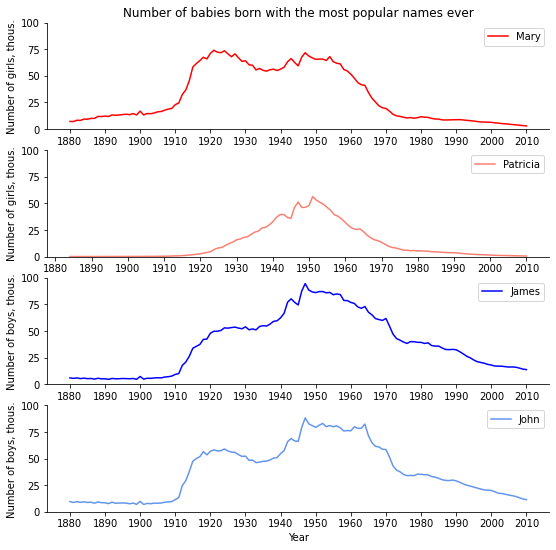

In [19]:
plt.figure(figsize=(9, 9))

plt.subplot(4, 1, 1)
plt.plot(babies_mary, color='red', label='Mary')
plt.title('Number of babies born with the most popular names ever')
plt.xlabel('Year')
plt.ylabel('Number of girls, thous.')
plt.xticks(np.arange(min(babies.year), max(babies.year)+1, 10))
plt.ylim((0, plt_max))
plt.yticks(np.arange(0, plt_max + 1, plt_max // 4),
           np.arange(0, plt_max // 1000 + 1, plt_max // 1000 // 4))
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(4, 1, 2)
plt.plot(babies_patr, color='salmon', label='Patricia')
plt.xlabel('Year')
plt.ylabel('Number of girls, thous.')
plt.xticks(np.arange(min(babies.year), max(babies.year)+1, 10))
plt.ylim((0, plt_max))
plt.yticks(np.arange(0, plt_max + 1, plt_max // 4),
           np.arange(0, plt_max // 1000 + 1, plt_max // 1000 // 4))
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(4, 1, 3)
plt.plot(babies_james, color='blue', label='James')
plt.xlabel('Year')
plt.ylabel('Number of boys, thous.')
plt.xticks(np.arange(min(babies.year), max(babies.year)+1, 10))
plt.ylim((0, plt_max))
plt.yticks(np.arange(0, plt_max + 1, plt_max // 4),
           np.arange(0, plt_max // 1000 + 1, plt_max // 1000 // 4))
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(4, 1, 4)
plt.plot(babies_john, color='cornflowerblue', label='John')
plt.xlabel('Year')
plt.ylabel('Number of boys, thous.')
plt.xticks(np.arange(min(babies.year), max(babies.year)+1, 10))
plt.ylim((0, plt_max))
plt.yticks(np.arange(0, plt_max + 1, plt_max // 4),
           np.arange(0, plt_max // 1000 + 1, plt_max // 1000 // 4))
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

На графиках представлена абсолютная численность детей, получивших соответствующее имя в соответствующем году. Поэтому на графиках отражается не только изменение популярности каждого имени с течением времени, но и общие тенденции в динамике рождаемости.
Больше всего девочек с именем Mary за всю историю наблюдений родилось в начале 1920-х гг. и в конце 1940-х. 
Пик популярности имени Patricia пришёлся на начало 1950-х гг., но на протяжении всей истории наблюдений оно заметно уступало по популярности имени Mary.
Разрыв в популярности мужских имён James и John не был столь существенным. В обоих случаях наибольшее число мальчиков с этими именами родились в конце 1940-х гг., но у имени John были всплески популярности в начале 1920-х и в середине 1960-х гг.

## Задание 4

1. В оригинальном датафрейме babies создайте новую колонку - первая буква имени.
2. Выберете год из датасета. Сгруппируйте датасет, чтобы в нем в рядах были первые буквы, а в колонках - количество детей с такими именами. Сохраните три новых датафрейма для любых трех лет из выборки с такой группировкой.
3. Создайте фигуру matplotlib с 3 горизонтальными графиками один под другим.
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. Постройте столбчатую диаграмму для каждого года. 
6. Сделайте вывод - какие первые буквы имени были самыми популярными в каждом году.

In [20]:
def first_letter(x):
    return x[0]

babies['first_letter'] = babies['name'].apply(first_letter)
babies

,name,sex,number,year,first_letter
0,Mary,F,7065,1880,M
1,Anna,F,2604,1880,A
2,Emma,F,2003,1880,E
3,Elizabeth,F,1939,1880,E
4,Minnie,F,1746,1880,M
...,...,...,...,...,...
33833,Zymaire,M,5,2010,Z
33834,Zyonne,M,5,2010,Z
33835,Zyquarius,M,5,2010,Z
33836,Zyran,M,5,2010,Z


In [21]:
babies_1981 = babies.loc[babies['year'] == 1981, ['first_letter', 'number']]
babies_1981 = babies_1981.groupby('first_letter')['number'].sum().to_frame()
babies_1981.reset_index(inplace=True)
babies_1981.head()

,first_letter,number
0,A,331914
1,B,169431
2,C,274548
3,D,207451
4,E,135082


In [22]:
babies_1881 = babies.loc[babies['year'] == 1881, ['first_letter', 'number']]
babies_1881 = babies_1881.groupby('first_letter')['number'].sum().to_frame()
babies_1881.reset_index(inplace=True)
babies_1881.head()

,first_letter,number
0,A,16257
1,B,6006
2,C,14708
3,D,4467
4,E,18247


In [23]:
babies_2010 = babies.loc[babies['year'] == 2010, ['first_letter', 'number']]
babies_2010 = babies_2010.groupby('first_letter')['number'].sum().to_frame()
babies_2010.reset_index(inplace=True)
babies_2010.head()

,first_letter,number
0,A,508478
1,B,172651
2,C,265136
3,D,170509
4,E,221337


In [24]:
babies_years = babies_1881.merge(babies_1981, how='outer', on='first_letter', sort=True, suffixes=('_1881', '_1981'))
babies_years = babies_years.merge(babies_2010, how='outer', on='first_letter', sort=True)
babies_years.rename(columns = {'number': 'number_2010'}, inplace=True)
babies_years.head()

,first_letter,number_1881,number_1981,number_2010
0,A,16257.0,331914,508478
1,B,6006.0,169431,172651
2,C,14708.0,274548,265136
3,D,4467.0,207451,170509
4,E,18247.0,135082,221337


In [25]:
plt_max_1881 = int(np.ceil(babies_1881['number'].max() / 10000) * 10000)
plt_max_1881

30000

In [26]:
plt_max_1981 = int(np.ceil(babies_1981['number'].max() / 100000) * 100000)
plt_max_1981

600000

In [27]:
plt_max_2010 = int(np.ceil(babies_2010['number'].max() / 100000) * 100000)
plt_max_2010

600000

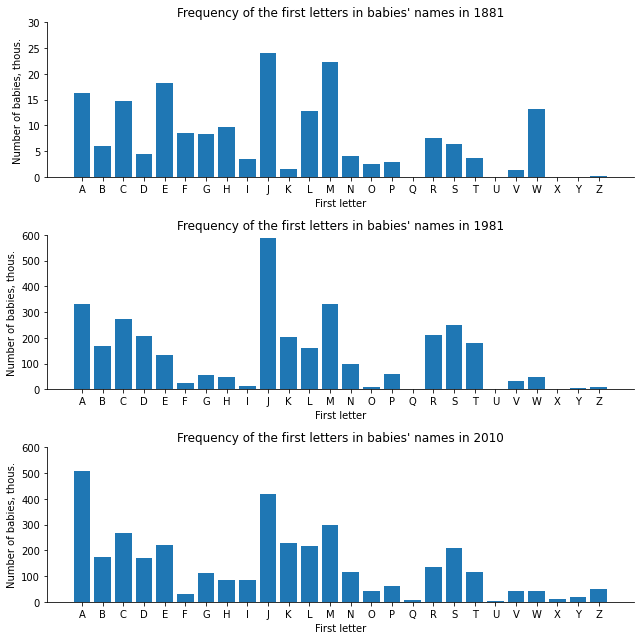

In [28]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.bar(babies_years['first_letter'], babies_years['number_1881'])
plt.title("Frequency of the first letters in babies' names in 1881")
plt.xlabel('First letter')
plt.ylabel('Number of babies, thous.')
plt.ylim((0, plt_max_1881))
plt.yticks(np.arange(0, plt_max_1881 + 1, plt_max_1881 // 6),
           np.arange(0, plt_max_1881 // 1000 + 1, plt_max_1881 // 1000 // 6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 1, 2)
plt.bar(babies_years['first_letter'], babies_years['number_1981'])
plt.title("Frequency of the first letters in babies' names in 1981")
plt.xlabel('First letter')
plt.ylabel('Number of babies, thous.')
plt.ylim((0, plt_max_1981))
plt.yticks(np.arange(0, plt_max_1981 + 1, plt_max_1981 // 6),
           np.arange(0, plt_max_1981 // 1000 + 1, plt_max_1981 // 1000 // 6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 1, 3)
plt.bar(babies_years['first_letter'], babies_years['number_2010'])
plt.title("Frequency of the first letters in babies' names in 2010")
plt.xlabel('First letter')
plt.ylabel('Number of babies, thous.')
plt.ylim((0, plt_max_2010))
plt.yticks(np.arange(0, plt_max_2010 + 1, plt_max_2010 // 6),
           np.arange(0, plt_max_2010 // 1000 + 1, plt_max_2010 // 1000 // 6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

Для удобства сравнения частот встречаемости имён на разные буквы построю stacked bar chart с данными в % от общего числа детей, родившихся в соответствующий год.

In [29]:
babies_years['pct_1881'] = round(babies_years['number_1881'] / babies_years['number_1881'].sum() * 100, 1)
babies_years['pct_1981'] = round(babies_years['number_1981'] / babies_years['number_1981'].sum() * 100, 1)
babies_years['pct_2010'] = round(babies_years['number_2010'] / babies_years['number_2010'].sum() * 100, 1)

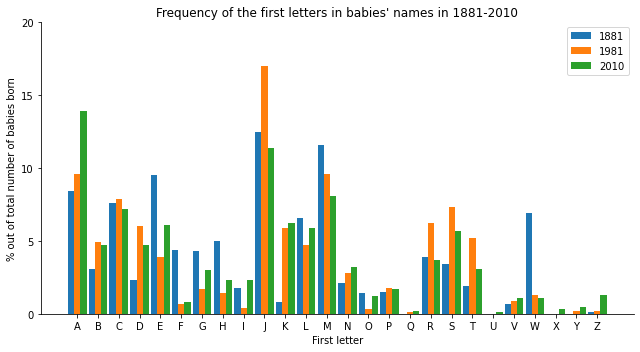

In [30]:
labels = babies_years['first_letter']

x = np.arange(len(labels))
width = 0.3 

fig, ax = plt.subplots(figsize=(9, 5))
bars_1881 = ax.bar(x - width, babies_years['pct_1881'], width, label='1881')
bars_1981 = ax.bar(x, babies_years['pct_1981'], width, label='1981')
bars_2010 = ax.bar(x + width, babies_years['pct_2010'], width, label='2010')

plt.title("Frequency of the first letters in babies' names in 1881-2010")
plt.xlabel('First letter')
plt.ylabel('% out of total number of babies born')
plt.ylim((0, 20))
plt.yticks(np.arange(0, 21, 5))
plt.xticks(x, labels)
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

Имена на букву J остаются самыми популярными на протяжении более чем 100 лет, хотя их отрыв по популярности заметно увеличился к концу XX в. 

## Задание 4

1. Создайте фигуру matplotlib с двумя осями координат (1 ряд, две колонки)
2. В первой оси координат для датасета pima постройте мультивариативный график рассеяния. Шкала x - уровень глюкозы, шкала y - давление, размер - возраст, цвет - наличие диабета (Class). 
3. Во второй оси координат постройте мультивариативный график, где по x - количество беременностей, y - BMI, цвет - наличие диабета. У этого графика принудительно приведите значения шкалы x к дискретным (с помощью метода оси координат, смотрели такой для леса).
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. По графикам вывод как эти переменные могут быть связаны с зависимой переменной (класс).


In [31]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


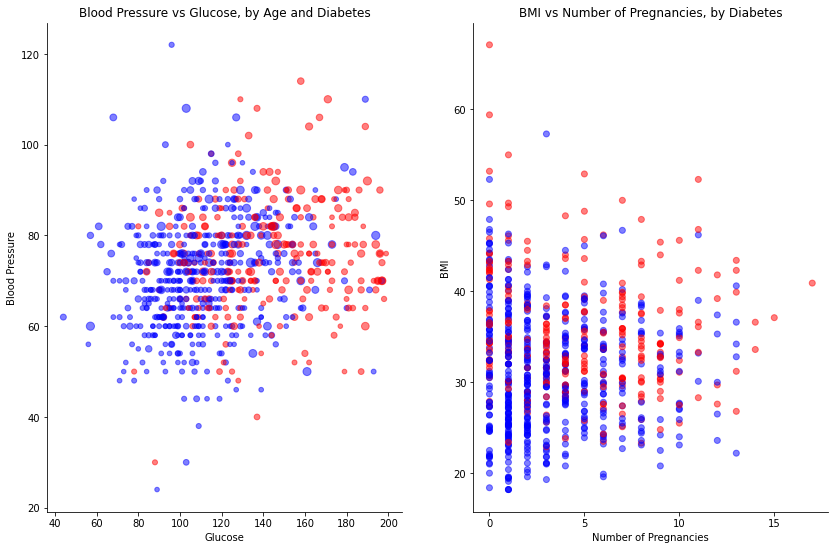

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(14, 9))

ax[0].scatter(pima['Glucose'], 
              pima['BloodPressure'],
              s=pima['Age'],
              c=pd.Categorical(pima['Class']),
              cmap='bwr',
              alpha = 0.5)
ax[0].set_xlabel('Glucose')
ax[0].set_ylabel('Blood Pressure')
ax[0].set_title('Blood Pressure vs Glucose, by Age and Diabetes')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].scatter(pima['Pregnancies'], 
              pima['BMI'],
              c=pd.Categorical(pima['Class']),
              cmap='bwr',
              alpha = 0.5)
ax[1].locator_params(integer=True)
ax[1].set_xlabel('Number of Pregnancies')
ax[1].set_ylabel('BMI')
ax[1].set_title('BMI vs Number of Pregnancies, by Diabetes')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False);

При диабете, в среднем, выше уровень глюкозы в крови (по определению), выше уровень артериального давления и больше ИМТ. 

От себя добавлю, что, во-первых, наличие диабета сложно назвать зависимой переменной для уровня давления и ИМТ (особенно для давления) - скорее наоборот, повышение давления является следствием (осложнением) диабета, а ИМТ может быть как сопутствующей характеристикой, так и осложнением.

Во-вторых, я никогда бы не стала строить подобные графики, чтобы судить о том, есть ли связь между наличием диабета и перечисленными характеристиками. Boxplot был бы куда уместнее и нагляднее. См. ниже.

По построенным графикам (больше даже по первому, т.к. второй менее наглядный из-за дискретности по оси Х) можно только строить предположения относительно того, различается ли связь между x и y в зависимости от наличия у пациента диабета. И на первый взгляд, таких различий нет. Иными словами, как с диабетом, так и без него, чем выше уровень глюкозы, тем выше уровень давления, а взаимосвязи между количеством беременностей и ИМТ, по всей видимости, нет.

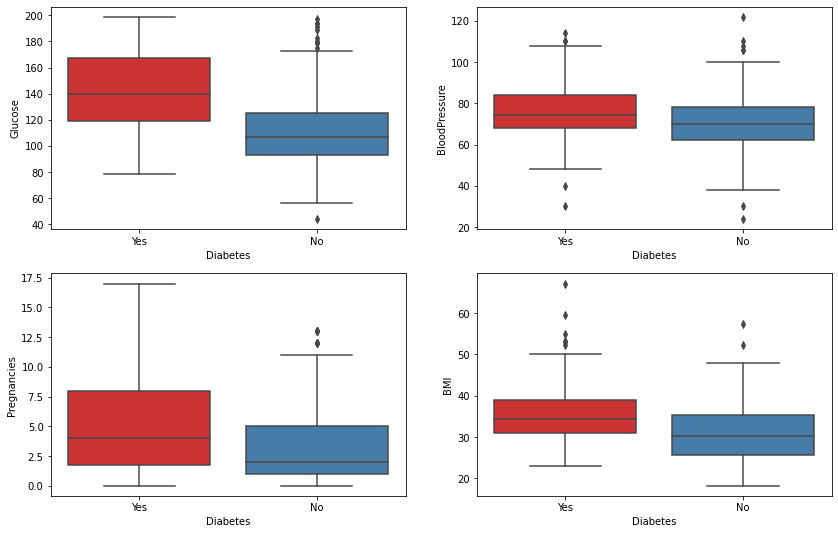

In [58]:
import seaborn as sns
fig, ax = plt.subplots(2, 2, figsize=(14, 9))

sns.boxplot(ax=ax[0][0], x='Class', y='Glucose', 
            data=pima, palette='Set1', 
            order=[1,0]).set(xlabel='Diabetes',
                             xticklabels=['Yes', 'No'])
sns.boxplot(ax=ax[0][1], x='Class', y='BloodPressure', 
            data=pima, palette='Set1',
            order=[1,0]).set(xlabel='Diabetes',
                             xticklabels=['Yes', 'No'])
sns.boxplot(ax=ax[1][0], x='Class', y='Pregnancies', 
            data=pima, palette='Set1',
            order=[1,0]).set(xlabel='Diabetes',
                             xticklabels=['Yes', 'No'])
sns.boxplot(ax=ax[1][1], x='Class', y='BMI', 
            data=pima, palette='Set1',
            order=[1,0]).set(xlabel='Diabetes',
                             xticklabels=['Yes', 'No']);

На мой взгляд, так проще заметить, что все показатели, в среднем, выше у пациенток с диабетом. Кроме того, заметно, что среди женщин без диабета есть случаи с довольно высоким уровнем глюкозы в крови - возникает вопрос, действительно ли у них нет диабета.

## Дополнительное задание

1. Создайте на основе датасета pima новый датасет: ряды - количество беременностей, колонки: mean_glucose (средний показатель уровня глюкозы для каждого количества беременностей), mean_bmi (аналогично для BMI). 
2. Создайте фигуру matplotlib с одни объектом.
2. Постройте для этого датасета совмещенную столбчатую диаграмму (для каждого значения переменной Pregnancies должно быть две колонки - mean_glucose, mean_bmi.
3. Верхняя и правая границы графика должны быть невидимы, график должен быть с заголовком, шкалы графика должны быть подписаны.
4. Сделайте вывод о связи количества беременностей и средних уровней глюкозы и индекса массы тела.

**Не совсем понятное задание**: по оси Y одновременно должны откладываться средний уровень глюкозы и средний уровень индекса массы тела?? Разве так корректно делать для переменных, у которых разные единиы измерения??

Я построю график с двумя осями Y. На мой взгляд, его удобнее сделать с помощью встроенного в pandas метода plot.

In [78]:
preg_data = pima.groupby('Pregnancies')[['BMI', 'Glucose']].agg('mean')
preg_data

,BMI,Glucose
Pregnancies,,
0,35.242593,123.000000
1,31.372593,115.310606
2,31.189109,110.796117
3,30.836486,123.586667
4,32.141176,125.117647
5,33.785714,120.982143
6,30.908163,123.265306
7,33.372727,136.444444
8,32.421622,131.736842


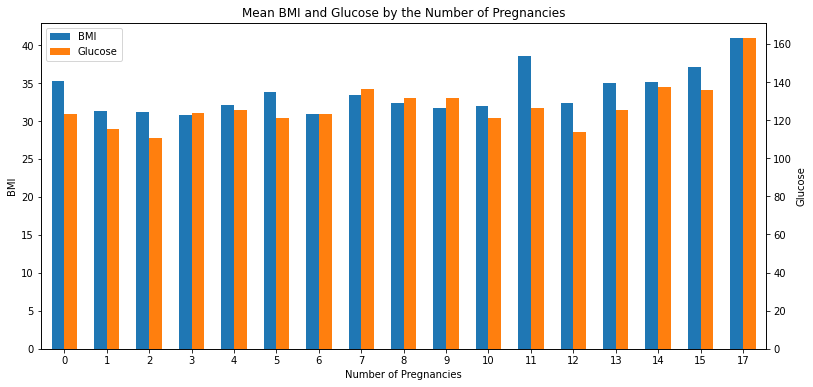

In [96]:
preg_data.plot(kind='bar', secondary_y='Glucose', mark_right=False,
               rot=0, width=0.6, figsize=(13,6),
               title='Mean BMI and Glucose by the Number of Pregnancies',
               xlabel='Number of Pregnancies',
               ylabel='BMI').right_ax.set_ylabel('Glucose');

На мой взгляд, по этому графику довольно сложно судить о связи количества беременностей и средних уровней глюкозы и индекса массы тела. Есть ощущение, что количество беременностей не связано ни с тем, ни с другим. Я не беру в расчёт женщин с числом беременностей более 10 (там есть некоторая тенденция к росту обоих показателей), т.к. там относительно небольшое число наблюдений (см. ниже), чтобы можно было это утверждать с большой долей уверенности.

In [97]:
pima['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64